In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", 10000)
pd.set_option('display.max_columns',15)
pd.set_option('display.width', 10000)

In [8]:
os.getcwd()

'C:\\Users\\SavadamuthuSaravanan'

In [10]:
dataset = pd.read_csv('C:\\Users\\SavadamuthuSaravanan\Churn_Modelling.csv')
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
dataset = dataset.iloc[:,3:]
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
dataset['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
dataset['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
dataset['Gender'] = dataset['Gender'].astype('category')
dataset['Gender'] = dataset['Gender'].cat.codes

In [9]:
dataset = pd.get_dummies(dataset, columns=['Geography'])

In [10]:
dataset.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [11]:
dataset = dataset.drop(['Geography_France'], axis=1)

In [12]:
dataset.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int8   
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(7), int8(1), uint8(2)
memory usage: 732.5 KB


In [14]:
for i in dataset.columns:
    print("**********************************", i ,
         "*******************************************")
    print()
    print(set(dataset[i].tolist()))
    print()

********************************** CreditScore *******************************************

{350, 351, 358, 359, 363, 365, 367, 373, 376, 382, 383, 386, 395, 399, 401, 404, 405, 407, 408, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 57

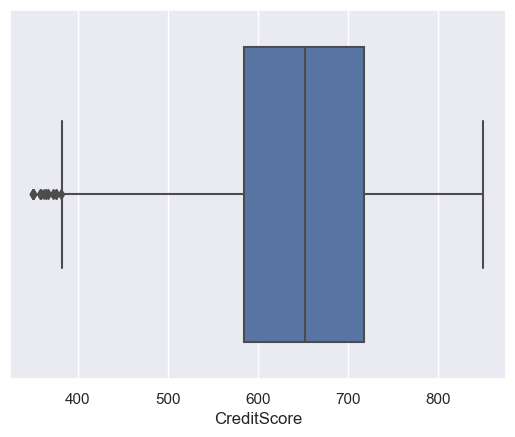

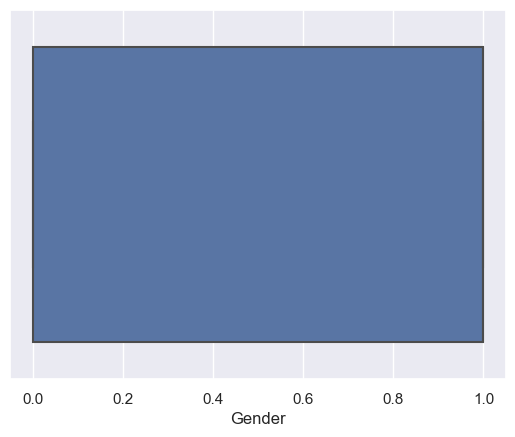

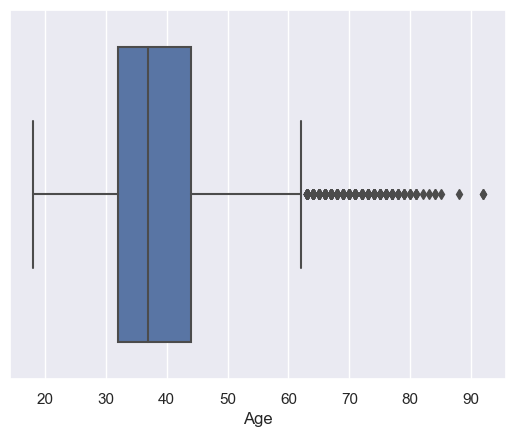

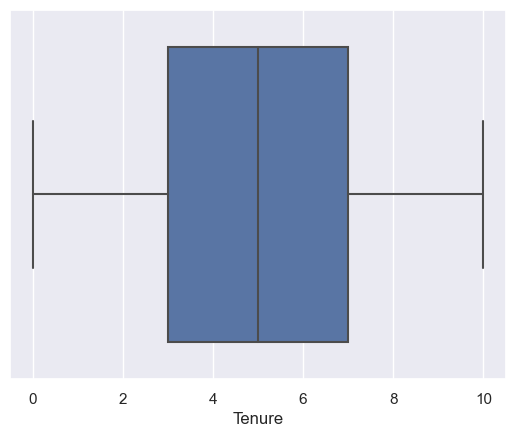

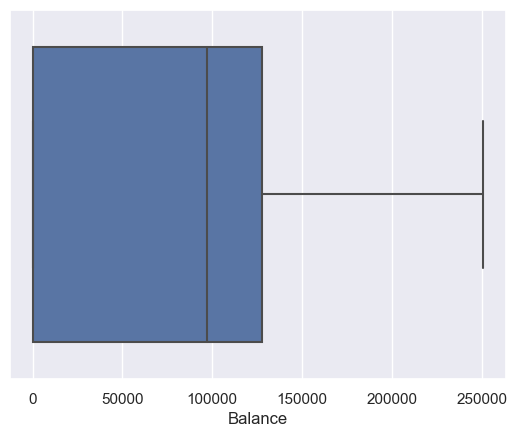

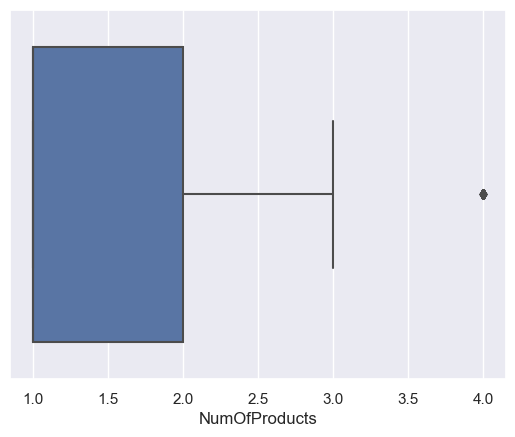

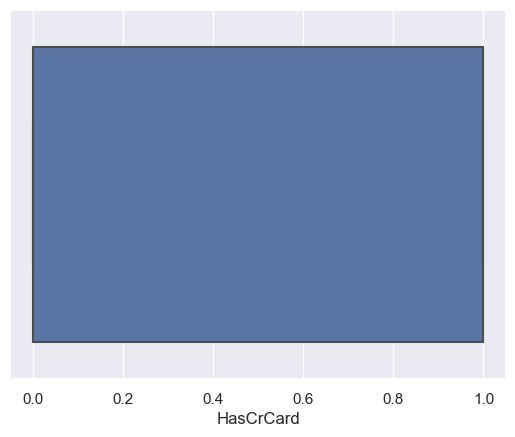

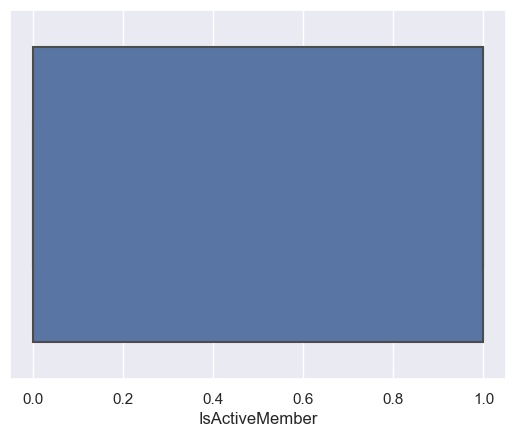

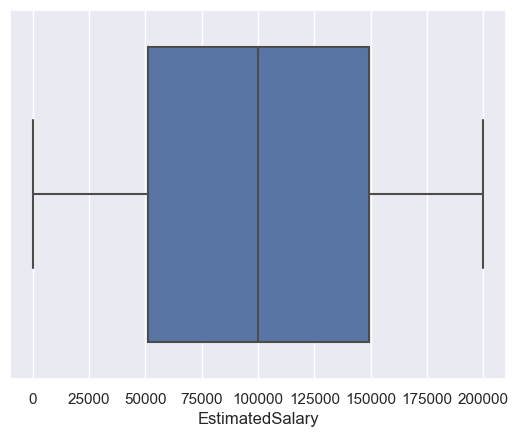

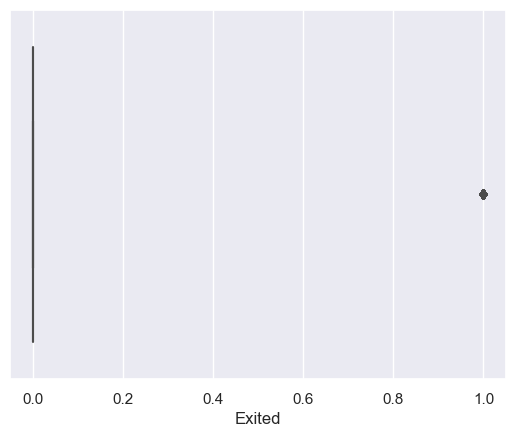

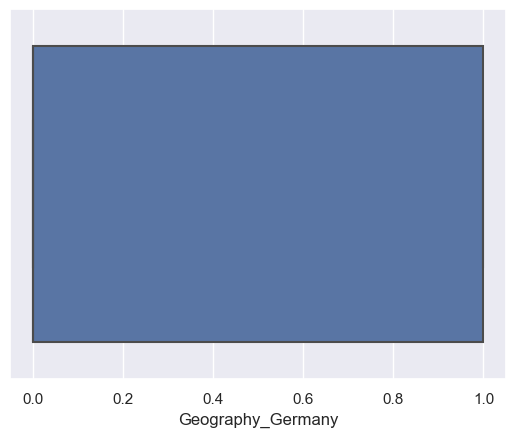

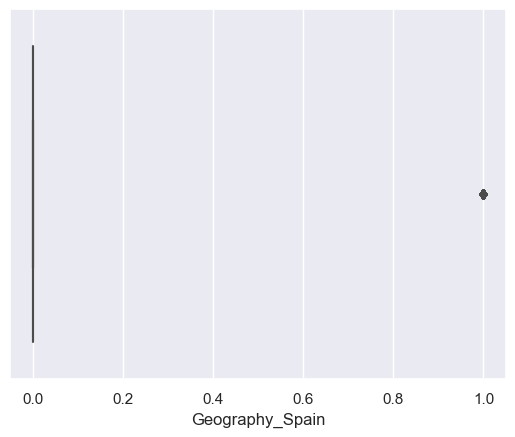

In [15]:
def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()
    
for i in list(dataset.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [16]:
# Split the data into ind variable and dep variable
x = dataset.drop(['Exited'], axis=1)
y = dataset[['Exited']]

In [17]:
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


In [18]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [19]:
# Feature Scaling required
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1 = sc.fit_transform(x)
pd.DataFrame(x1).head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.326221,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.578736,-0.573809
1,-0.440036,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.578736,1.742740
2,-1.536794,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.578736,-0.573809
3,0.501521,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.578736,-0.573809
4,2.063884,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.578736,1.742740


In [20]:
# Check imbalance dataset
y.value_counts()

Exited
0         7963
1         2037
dtype: int64

In [21]:
import imblearn

In [23]:
from imblearn.over_sampling import RandomOverSampler # SMOTE
ros = RandomOverSampler() # SMOTE()
x_sam, y_sam = ros.fit_resample(x1, y)
print(x_sam.shape, y_sam.shape, y.shape)

(15926, 11) (15926, 1) (10000, 1)


In [24]:
y_sam.value_counts()

Exited
0         7963
1         7963
dtype: int64

In [25]:
dataset.corr()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
CreditScore,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780
Gender,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,-0.024628,0.016889
Age,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685
Tenure,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868
Balance,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892
NumOfProducts,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039
HasCrCard,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480
IsActiveMember,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732
EstimatedSalary,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482
Exited,-0.027094,-0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667


<AxesSubplot:>

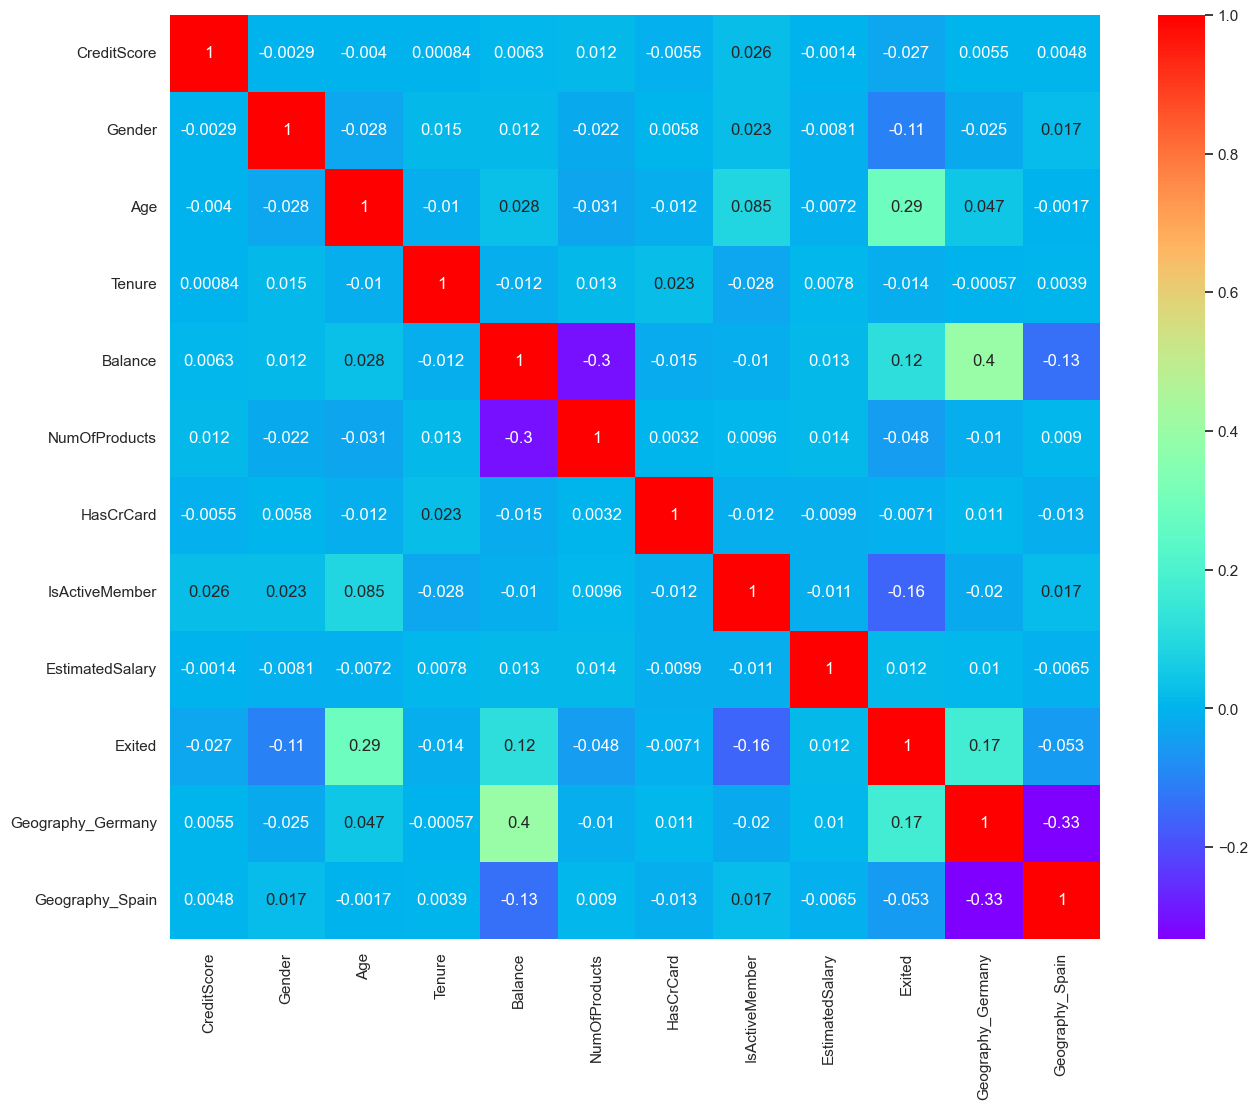

In [27]:
plt.figure(figsize=(15,12))
sns.heatmap(dataset.corr(), annot=True, cmap='rainbow')

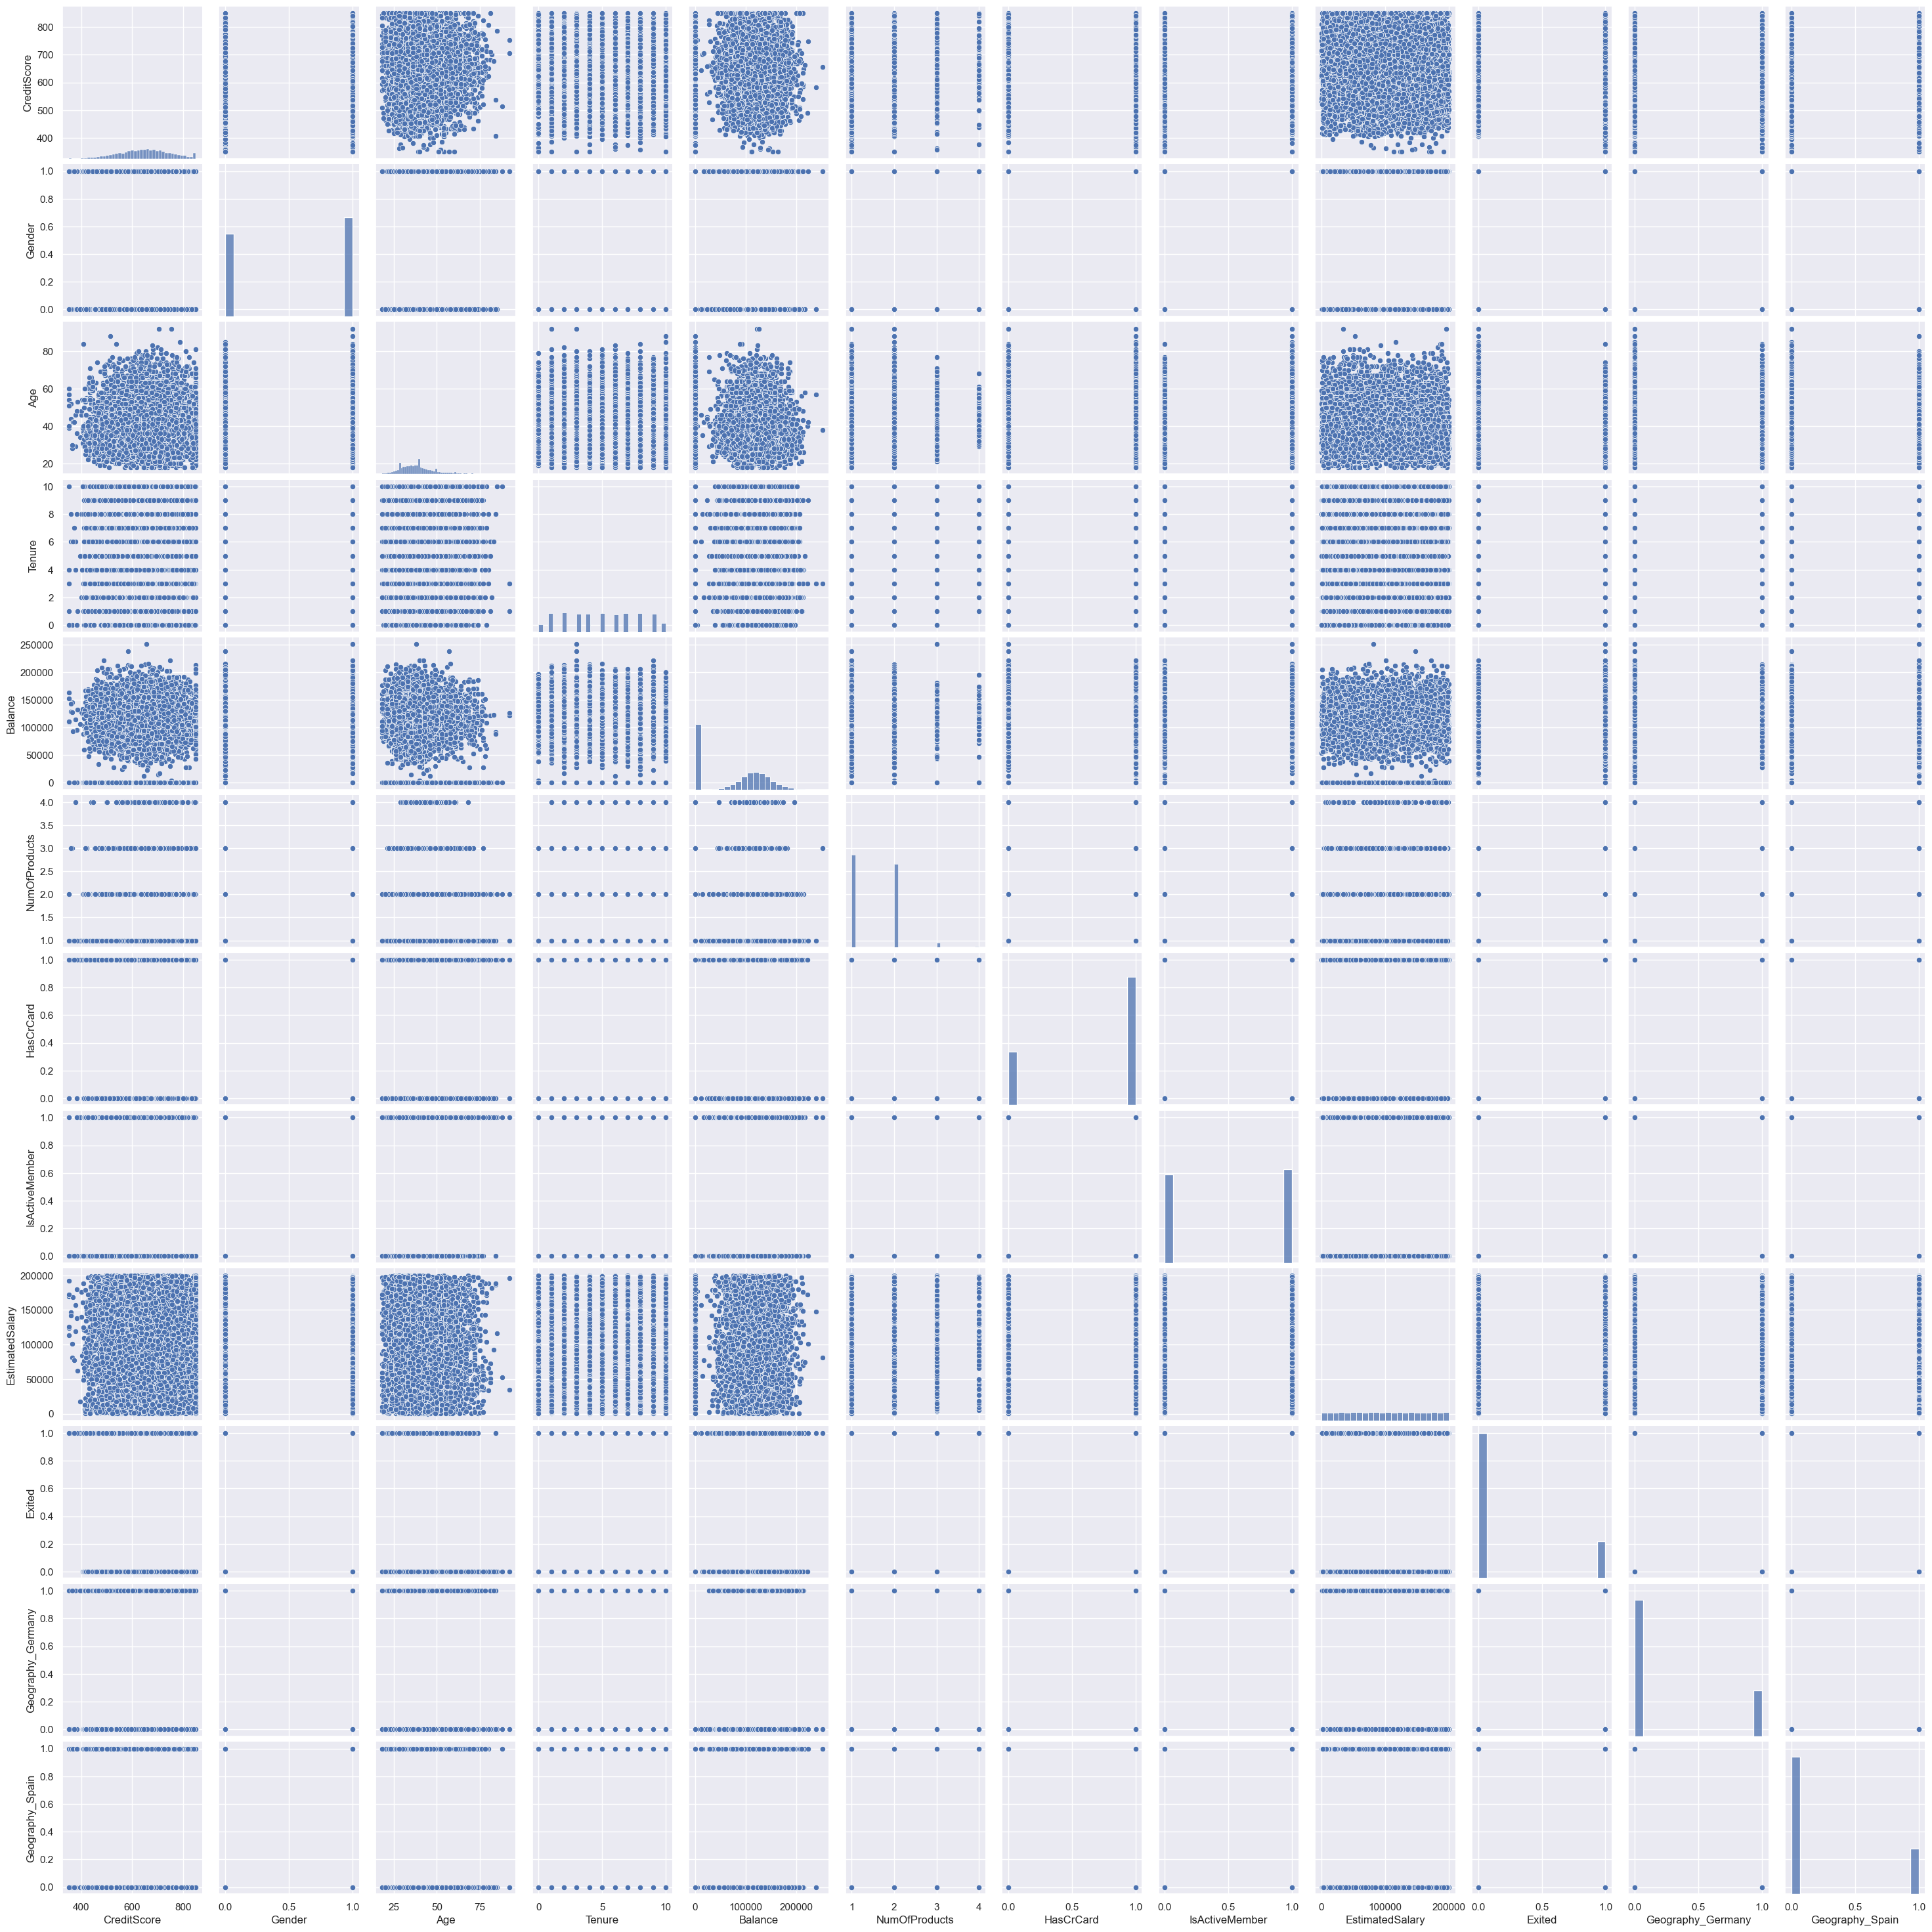

In [28]:
sns.pairplot(dataset)

<AxesSubplot:xlabel='Exited'>

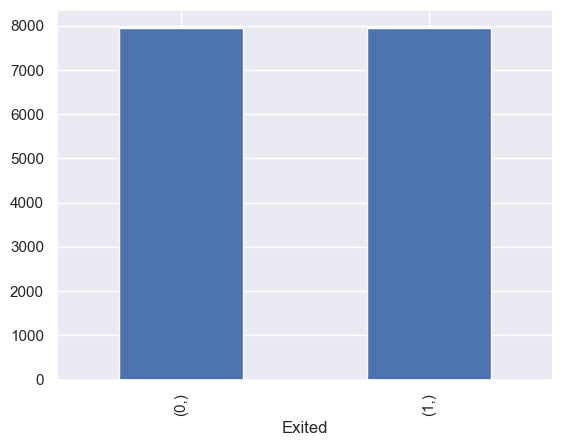

In [29]:
pd.DataFrame(y_sam).value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Exited'>

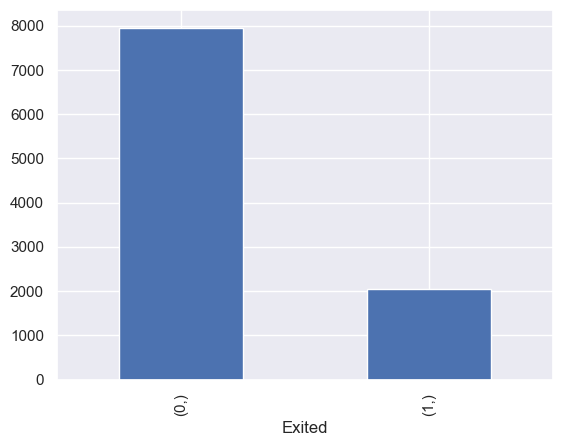

In [30]:
pd.DataFrame(y).value_counts().plot(kind='bar')

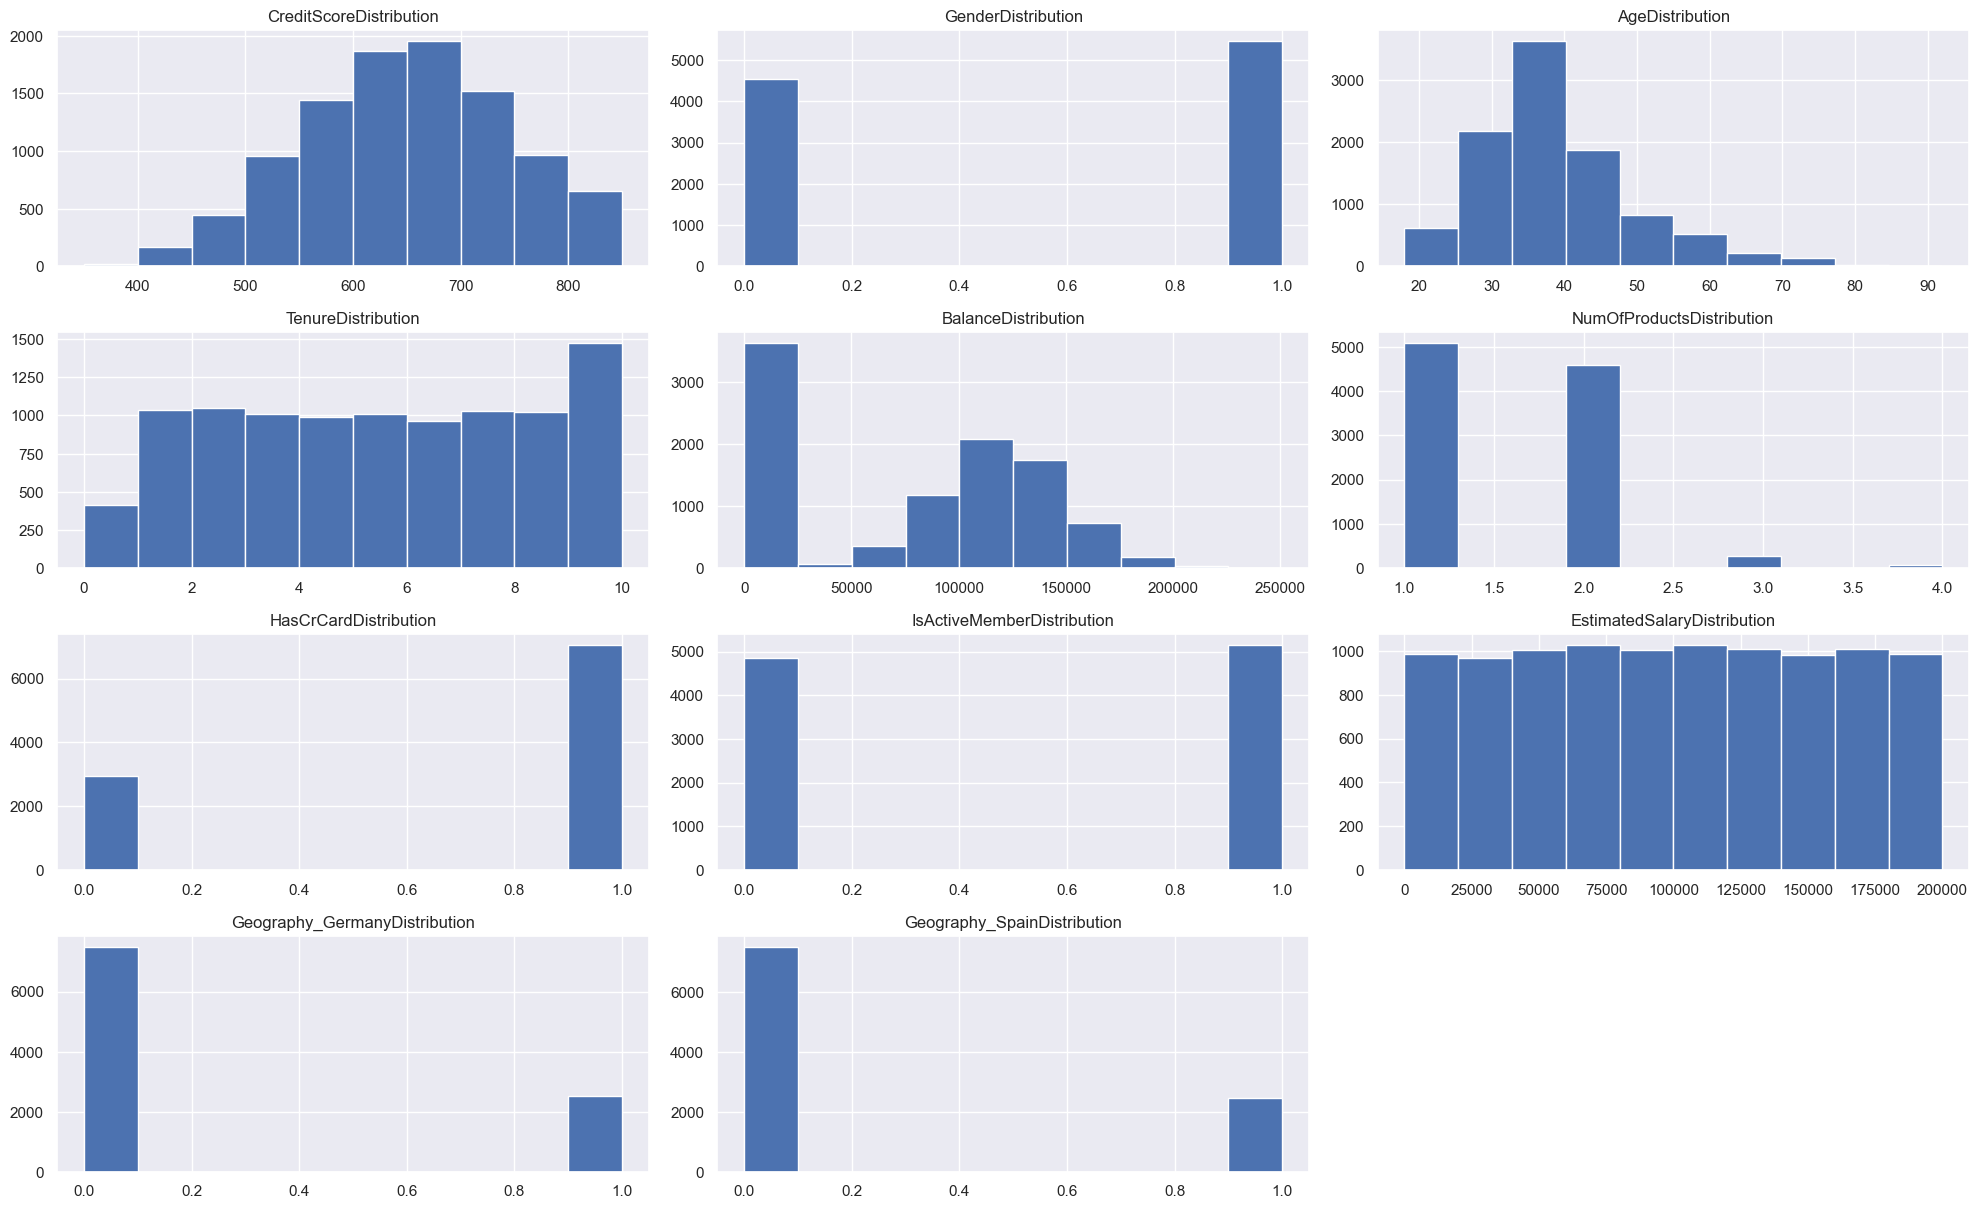

In [31]:
def histograms(dataset, variables, n_rows, n_cols):
    fig = plt.figure(figsize=(20,15))
    for i , var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        dataset[var_name].hist(bins=10, ax=ax)
        ax.set_title(var_name +"Distribution")
    fig.tight_layout()
    plt.show()
    
histograms(dataset, x, 5,3)

In [33]:
import dtale
import dtale.app as dtale_app

In [34]:
dtale.show(dataset)

# split the data into training and test

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sam, y_sam, test_size=0.25, random_state=101,
                                                  stratify=y_sam )

# Building Bagging Algorithm 

In [37]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
bagging.fit(x_train, y_train)

BaggingClassifier()

In [38]:
# predict
y_pred_train_bgg = bagging.predict(x_train)
y_pred_test_bgg = bagging.predict(x_test)

In [39]:
# Evaluate 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [40]:
print(confusion_matrix(y_train, y_pred_train_bgg))
print()
print(confusion_matrix(y_test, y_pred_test_bgg))

[[5960   12]
 [  13 5959]]

[[1786  205]
 [  61 1930]]


In [41]:
print(classification_report(y_train, y_pred_train_bgg))
print()
print(classification_report(y_test, y_pred_test_bgg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5972
           1       1.00      1.00      1.00      5972

    accuracy                           1.00     11944
   macro avg       1.00      1.00      1.00     11944
weighted avg       1.00      1.00      1.00     11944


              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1991
           1       0.90      0.97      0.94      1991

    accuracy                           0.93      3982
   macro avg       0.94      0.93      0.93      3982
weighted avg       0.94      0.93      0.93      3982



In [42]:
print(accuracy_score(y_train, y_pred_train_bgg))
print()
print(accuracy_score(y_test, y_pred_test_bgg))

0.997906898861353

0.9331993972877951


# RandomForest Classifier Model

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', 
                            bootstrap=True, oob_score=False)
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [51]:
# predict
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

In [52]:
print(confusion_matrix(y_train, y_pred_train_rf))
print()
print(confusion_matrix(y_test, y_pred_test_rf))

[[5972    0]
 [   0 5972]]

[[1825  166]
 [  34 1957]]


In [53]:
print(classification_report(y_train, y_pred_train_rf))
print()
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5972
           1       1.00      1.00      1.00      5972

    accuracy                           1.00     11944
   macro avg       1.00      1.00      1.00     11944
weighted avg       1.00      1.00      1.00     11944


              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1991
           1       0.92      0.98      0.95      1991

    accuracy                           0.95      3982
   macro avg       0.95      0.95      0.95      3982
weighted avg       0.95      0.95      0.95      3982



In [54]:
print(accuracy_score(y_train, y_pred_train_rf))
print()
print(accuracy_score(y_test, y_pred_test_rf))

1.0

0.9497739829231542


In [56]:
# applying cross validation method in RandomForest
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(rf, x_train, y_train, cv=10)
accuracy.mean()

0.9404706937757126

In [57]:
print("Trainging Accuracy : ", accuracy.mean())
print()
print("Test Accuracy: ", accuracy_score(y_test, y_pred_test_rf))

Trainging Accuracy :  0.9404706937757126

Test Accuracy:  0.9497739829231542
